In [73]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
import astropy.units as u

In [239]:
def par(theta,v,c):
    '''find the total power per solid angle for a particle accelerating
    in the direction of its motion.

    Inputs:

        theta: float

            the angle between the velocity and some point

        v: float

            the velocity of the particle, in units of c

        c: float

            the speed of light=1 for this code

    Returns:

        p_par: float

            the power per solid angle emitted at
            the angle theta

    '''

    #calculate the power
    p_par=np.sin(theta)**2/((1-np.cos(theta)*v/c)**6)

    #calculate the power
    return p_par

def perp(theta,v,c):
    '''find the total power per solid angle for a particle accelerating
    perpendicular to the direction of its motion.

    Inputs:

        theta: float

            the angle between the velocity and some point

        v: float

            the velocity of the particle, in units of c

        c: float

            the speed of light=1 for this code

    Returns:

        p_perp: float

            the power per solid angle emitted at
            the angle theta

    '''

    #define gamma using v
    gamma=1/(np.sqrt(1-(v/c)**2))

    #calculate the power
    p_perp=(1/((1-np.cos(theta)*v/c)**4))*(1-((np.sin(theta)**2)/(gamma**2*(1-np.cos(theta)*v/c)**2)))

    return p_perp

def perp_3d(theta,phi,v,c):
    '''find the total power per solid angle for a particle accelerating
    perpendicular to the direction of its motion.

    Inputs:

        theta: float

            the angle between the velocity and some point

        phi: float

            the angle between the x-z plane and some point in the
            x-y plane

        v: float

            the velocity of the particle, in units of c

        c: float

            the speed of light=1 for this code

    Returns:

        p_perp: float

            the power per solid angle emitted at
            the angles theta and phi

    '''

    #define gamma using the velocity
    gamma=1/(np.sqrt(1-(v/c)**2))

    #calculate the power
    p_perp=(1/((1-np.cos(theta)*v/c)**4))*(1-((np.sin(theta)**2*np.cos(phi)**2)/(gamma**2*(1-np.cos(theta)*v/c)**2)))

    return p_perp

def v_gamma(gamma):
    '''find velocity given gamma

    Inputs:

        gamma: float

            the value gamma

    Returns:

        v: float

            the particle velocity in units of c

    '''

    
    #calculate the velocity
    v=np.sqrt(1-1/(gamma**2))

    return v

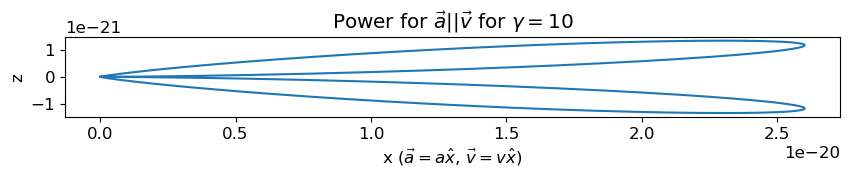

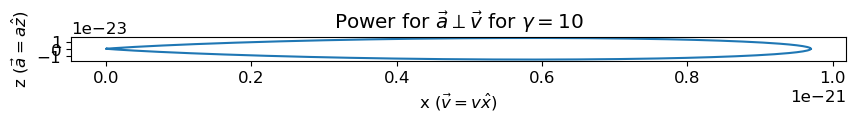

In [256]:

#define gamma
gamma=10

#find v given gamma
v=v_gamma(gamma)

#define the speed of light as 1
c=1

#create list holding all of the theta values
theta_list=np.linspace(0,2*np.pi,10000)

#create lists holding the components of power in the x and z direction
#for a charge accelerating along its velocity vector
x_par_list=[]
z_par_list=[]

#create lists holding the components of power in the x and z direction
#for a charge accelerating perpendicular to its velocity vector
x_perp_list=[]
z_perp_list=[]

#calculate the constant a to get the correct units of power
A=(const.e.esu**2/(4*np.pi*const.c.cgs)).value

#iterate through each value of theta
for theta in theta_list:

    #calculate the power per solid angle for
    #both types of acceleration
    p_par=A*par(theta,v,c)
    p_perp=A*perp(theta,v,c)

    #find the x and z components of power
    x_par=p_par*np.cos(theta)
    z_par=p_par*np.sin(theta)

    #add the powers to their respective lists
    x_par_list.append(x_par)
    z_par_list.append(z_par)

    #find the x and z components of power for perpendicular acceleration
    x_perp=p_perp*np.cos(theta)
    z_perp=p_perp*np.sin(theta)

    #update the lists
    x_perp_list.append(x_perp)
    z_perp_list.append(z_perp)

#set up plot for parallel acceleration
plt.rcParams.update({'font.size': 12})
fig,ax=plt.subplots(figsize=(10,10))

#plot graph for parallel acceleration
ax.plot((x_par_list),(z_par_list))
ax.set(title='Power for $\\vec{a}$||$\\vec{v}$ for $\gamma=$'+str(gamma),xlabel='x ($\\vec{a}=a \hat{x}$, $\\vec{v}=v \hat{x}$)',ylabel='z')
ax.set_aspect('equal')
plt.show()

#set up plot for perpendicular acceleration
fig,ax=plt.subplots(figsize=(10,10))

#plot power for perpendicular acceleration
ax.plot(x_perp_list,z_perp_list)
ax.set(title='Power for $\\vec{a}\perp\\vec{v}$ for $\gamma=$'+str(gamma),xlabel='x ($\\vec{v}=v \hat{x}$)',ylabel='z ($\\vec{a}=a\hat{z}$)')
ax.set_aspect('equal')
plt.show()

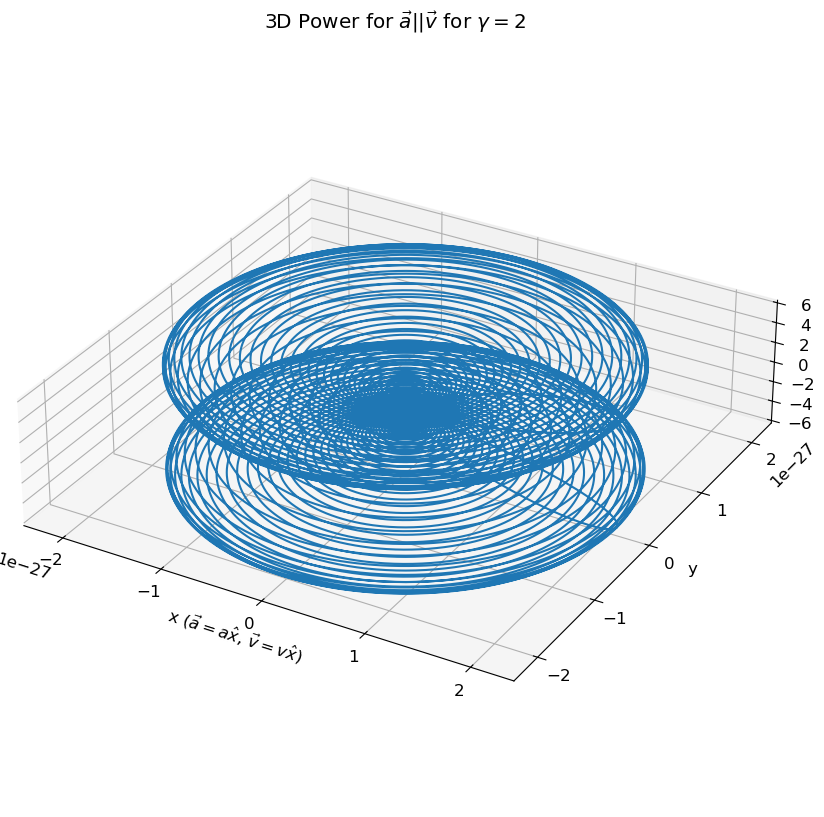

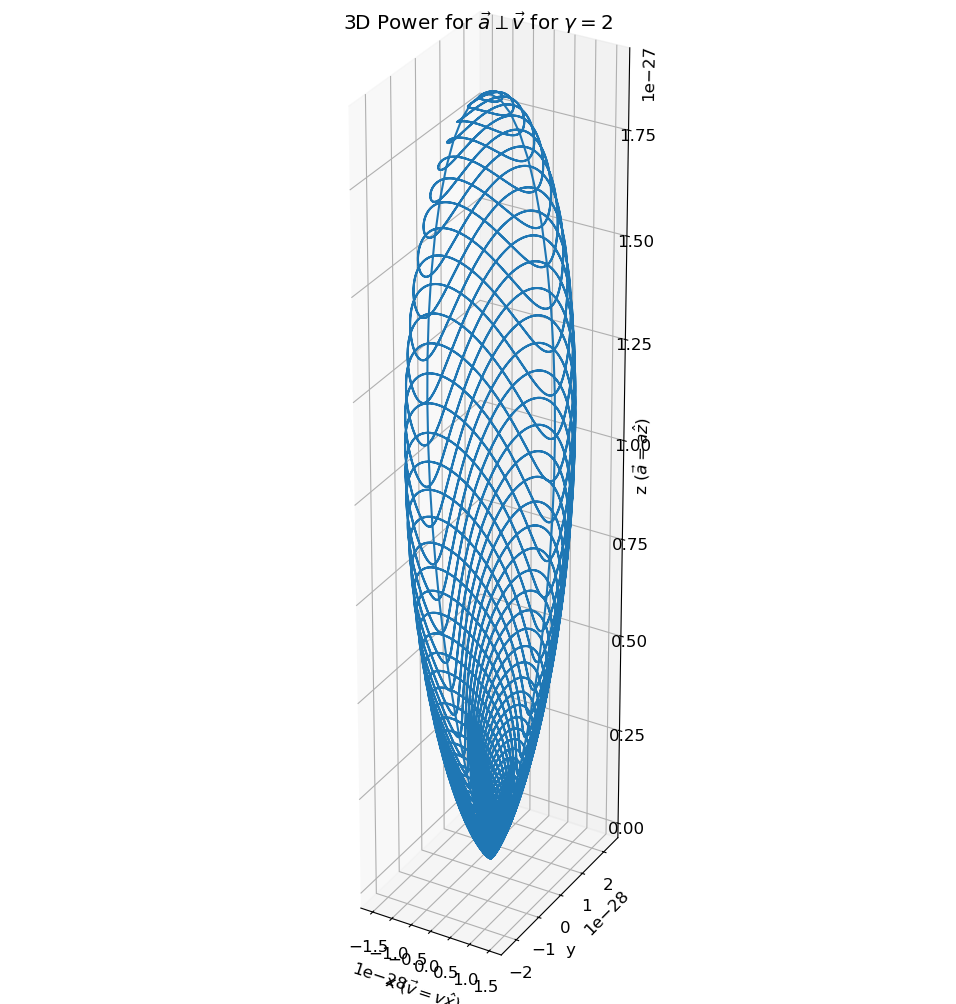

In [277]:
#define gamma, v, and c for 3d plots
gamma=2
v=v_gamma(gamma)
c=1

#set up theta and phi lists to iterate over
theta_list=np.linspace(0,2*np.pi,500)
phi_list=np.linspace(0,2*np.pi,500)

#prepare x, y, and z power component lists for parrallel acceleration
x_par_list=[]
y_par_list=[]
z_par_list=[]

#prepare x, y, and z power component lists for perpendicular acceleration
x_perp_list=[]
y_perp_list=[]
z_perp_list=[]

#calculate the constant a to get the correct units of power
A=(const.e.esu**2/(4*np.pi*const.c.cgs)).value

#iterate through phi and theta
for theta in theta_list:
    for phi in phi_list:
        #definee powers for perp and parallel acceleration
        #using pi/2-theta since theta in spherical coords is offset by 90
        #degrees from how we defined theta for parallel accel
        p_par=A*par(np.pi/2-theta,v,c)
        p_perp=A*perp_3d(theta,phi,v,c)

        #find the x, y, and z components of power for parallel accel
        x_par=p_par*np.sin(theta)*np.cos(phi)
        y_par=p_par*np.sin(theta)*np.sin(phi)
        z_par=p_par*np.cos(theta)

        #update x, y, and z power component lists
        x_par_list.append(x_par)
        y_par_list.append(y_par)
        z_par_list.append(z_par)

        #find the x, y, and z components of power for perpendicular accel
        x_perp=p_perp*np.sin(theta)*np.cos(phi)
        y_perp=p_perp*np.sin(theta)*np.sin(phi)
        z_perp=p_perp*np.cos(theta)

        #update x, y, and z power component lists
        x_perp_list.append(x_perp)
        y_perp_list.append(y_perp)
        z_perp_list.append(z_perp)

#set up plot for parallel acceleration
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

#plot graph for parallel acceleration
plt.plot(x_par_list,y_par_list,z_par_list)
ax.set(title='3D Power for $\\vec{a}$||$\\vec{v}$ for $\gamma=$'+str(gamma),xlabel='x ($\\vec{a}=a \hat{x}$, $\\vec{v}=v \hat{x}$)',ylabel='y',zlabel='z')
ax.set_aspect('equal')
plt.show()

#set up plot for perp acceleration
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

#plot graph for perp acceleration
plt.plot(x_perp_list,y_perp_list,z_perp_list)
ax.set(title='3D Power for $\\vec{a}\perp\\vec{v}$ for $\gamma=$'+str(gamma),xlabel='x ($\\vec{v}=v \hat{x}$)',ylabel='y',zlabel='z ($\\vec{a}=a \hat{z}$)')
ax.set_aspect('equal')
plt.tight_layout()
plt.show()
